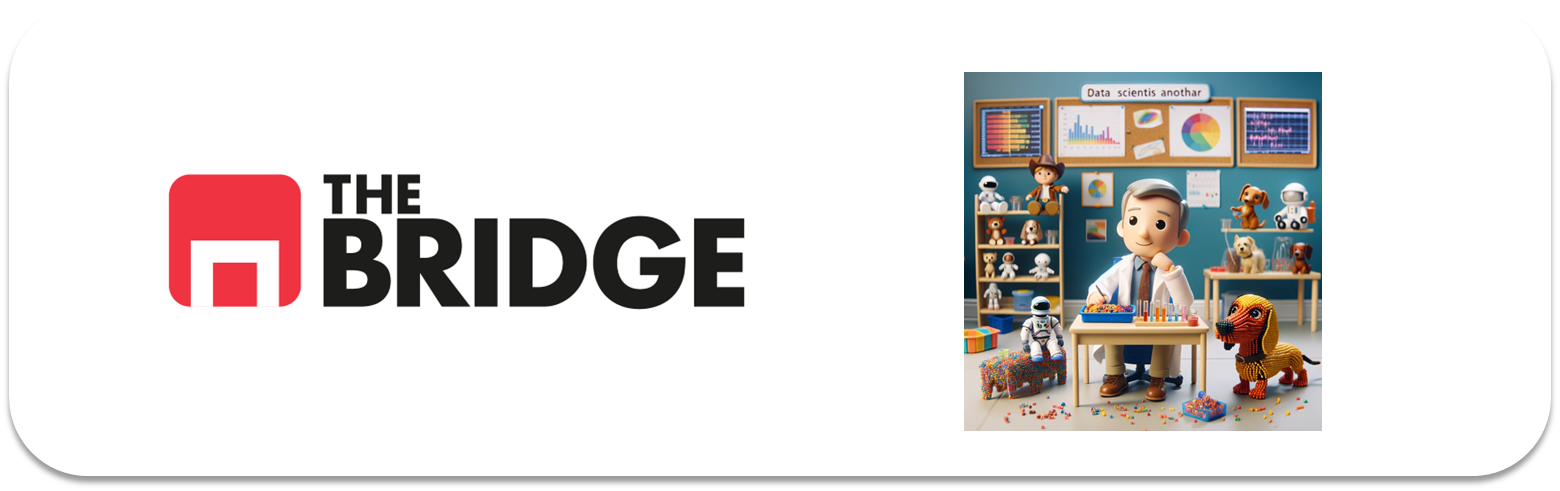

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [2]:
#FUNCIONES:
def var(df,listado):
    df_var=df[listado].describe().loc[["std","mean"]].T
    df_var["CV"]=df_var["std"]/df_var["mean"]
    return df_var

def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()



def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()



def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()


def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()


def mostrar_diagramas_violin(df, columnas_numericas):
    """
    Muestra una matriz de diagramas de violín para las columnas numéricas especificadas de un DataFrame.

    Args:
    df (pd.DataFrame): DataFrame que contiene los datos.
    columnas_numericas (list): Lista de nombres de las columnas numéricas.
    """
    num_cols = len(columnas_numericas)

    # Configurar el tamaño de la figura
    plt.figure(figsize=(num_cols * 4, 4))

    # Crear un diagrama de violín para cada columna numérica
    for i, col in enumerate(columnas_numericas, 1):
        plt.subplot(1, num_cols, i)
        sns.violinplot(y=df[col])
        plt.title(col)

    # Mostrar la matriz de diagramas de violín
    plt.tight_layout()
    plt.show()


def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```python sns.load_dataset(<nombre_del_dataset)``` a una variable "df_titanic"

In [3]:
data_set_names=sns.get_dataset_names()
print(data_set_names)
df_titanic=sns.load_dataset("titanic")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic.info()
#age, deck, embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [5]:
df_titanic.drop(columns="parch",inplace=True)
print("age: ",df_titanic.age.value_counts(True,dropna=False).loc[np.nan])
print("deck: ",df_titanic.deck.value_counts(True,dropna=False).loc[np.nan])
print("embarked: ",df_titanic.embarked.value_counts(True,dropna=False).loc[np.nan])
print("embark_town: ",df_titanic.embark_town.value_counts(True,dropna=False).loc[np.nan])



age:  0.19865319865319866
deck:  0.7721661054994389
embarked:  0.002244668911335578
embark_town:  0.002244668911335578


In [6]:
df_titanic.drop(columns="deck",inplace=True)

In [7]:
media_edad=df_titanic.age.mean()
df_titanic['age'].fillna(media_edad, inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [8]:
df_titanic['embarked'] = df_titanic['embarked'].astype('category')
moda = df_titanic['embarked'].mode().iloc[0]
df_titanic['embarked'].fillna(moda, inplace=True)

In [9]:
df_titanic['embark_town'] = df_titanic['embark_town'].astype('category')
moda = df_titanic['embark_town'].mode().iloc[0]
df_titanic['embark_town'].fillna(moda, inplace=True)
df_titanic.info()
df_titanic.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    category
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    category
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(3), object(3)
memory usage: 60.6+ KB


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
673,1,2,male,31.000000,0,13.0000,S,Second,man,True,Southampton,yes,True
628,0,3,male,26.000000,0,7.8958,S,Third,man,True,Southampton,no,True
236,0,2,male,44.000000,1,26.0000,S,Second,man,True,Southampton,no,False
647,1,1,male,56.000000,0,35.5000,C,First,man,True,Cherbourg,yes,True
700,1,1,female,18.000000,1,227.5250,C,First,woman,False,Cherbourg,yes,False
792,0,3,female,29.699118,8,69.5500,S,Third,woman,False,Southampton,no,False
608,1,2,female,22.000000,1,41.5792,C,Second,woman,False,Cherbourg,yes,False
396,0,3,female,31.000000,0,7.8542,S,Third,woman,False,Southampton,no,True
529,0,2,male,23.000000,2,11.5000,S,Second,man,True,Southampton,no,False
167,0,3,female,45.000000,1,27.9000,S,Third,woman,False,Southampton,no,False


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [10]:
def cardinalidad(df, umbral_categoria, umbral_continua):
    result_data = []

    for col in df.columns:
        cardinalidad = df[col].nunique()
        porcentaje_cardinalidad = cardinalidad / len(df) * 100

        if cardinalidad == 2:
            valoracion = "Binaria"
        elif cardinalidad < umbral_categoria:
            valoracion = "Categórica"
        elif cardinalidad >= umbral_categoria:
            if porcentaje_cardinalidad >= umbral_continua:
                valoracion = "Numérica Continua"
            else:
                valoracion = "Numérica Discreta"

        result_data.append({'Columna': col, 'Cardinalidad': cardinalidad,
                            '% Cardinalidad': porcentaje_cardinalidad, 'Valoración': valoracion})

    result_df = pd.DataFrame(result_data)
    return result_df

cardinalidad(df_titanic,10,30)

,Columna,Cardinalidad,% Cardinalidad,Valoración
0,survived,2,0.224467,Binaria
1,pclass,3,0.336700,Categórica
2,sex,2,0.224467,Binaria
3,age,89,9.988777,Numérica Discreta
4,sibsp,7,0.785634,Categórica
5,fare,248,27.833895,Numérica Discreta
6,embarked,3,0.336700,Categórica
7,class,3,0.336700,Categórica
8,who,3,0.336700,Categórica
9,adult_male,2,0.224467,Binaria



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|survived|sobrevive o no|binaria|0|||
|pclass|clase del pasajero|categórica|1|mayor tasa en clases altas?||
|sex|género|binaria|2|||
|age|edad|Numérica Discreta|2|||
|sibsp|familiares a bordo|categórica|2|||
|fare|precio del billete|Numérica Discreta|1|mayor tasa en billetes más caros?||
|embarked|inicial ciudad de ambarco|categórica|2|parece prescindible||
|class|clase|categórica|1|parece que está repetido||
|who|hombre, mujer, niño|categórica|2|||
|adult male|hombre adulto?|binaria|2|||
|embark town|ciudad de embarco|categórica|2|||
|alive|sobrevive|binaria|0|parece que está repetido||
|alone|viajaba solo?|binaria|1|mayor tasa en acompañados?||

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [11]:
df_titanic.embarked=df_titanic.embark_town 
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,Southampton,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,Southampton,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,Southampton,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,Cherbourg,First,man,True,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas
class, who, embarked

In [12]:
listado_categoricas=["class","who","embarked","alone","survived"]
for x in listado_categoricas:
    print(df_titanic[x].value_counts(True),"\n")

class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64 

who
man      0.602694
woman    0.304153
child    0.093154
Name: proportion, dtype: float64 

embarked
Southampton    0.725028
Cherbourg      0.188552
Queenstown     0.086420
Name: proportion, dtype: float64 

alone
True     0.602694
False    0.397306
Name: proportion, dtype: float64 

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64 



In [13]:
df_titanic[listado_categoricas].mode().T

,0
class,Third
who,man
embarked,Southampton
alone,True
survived,0


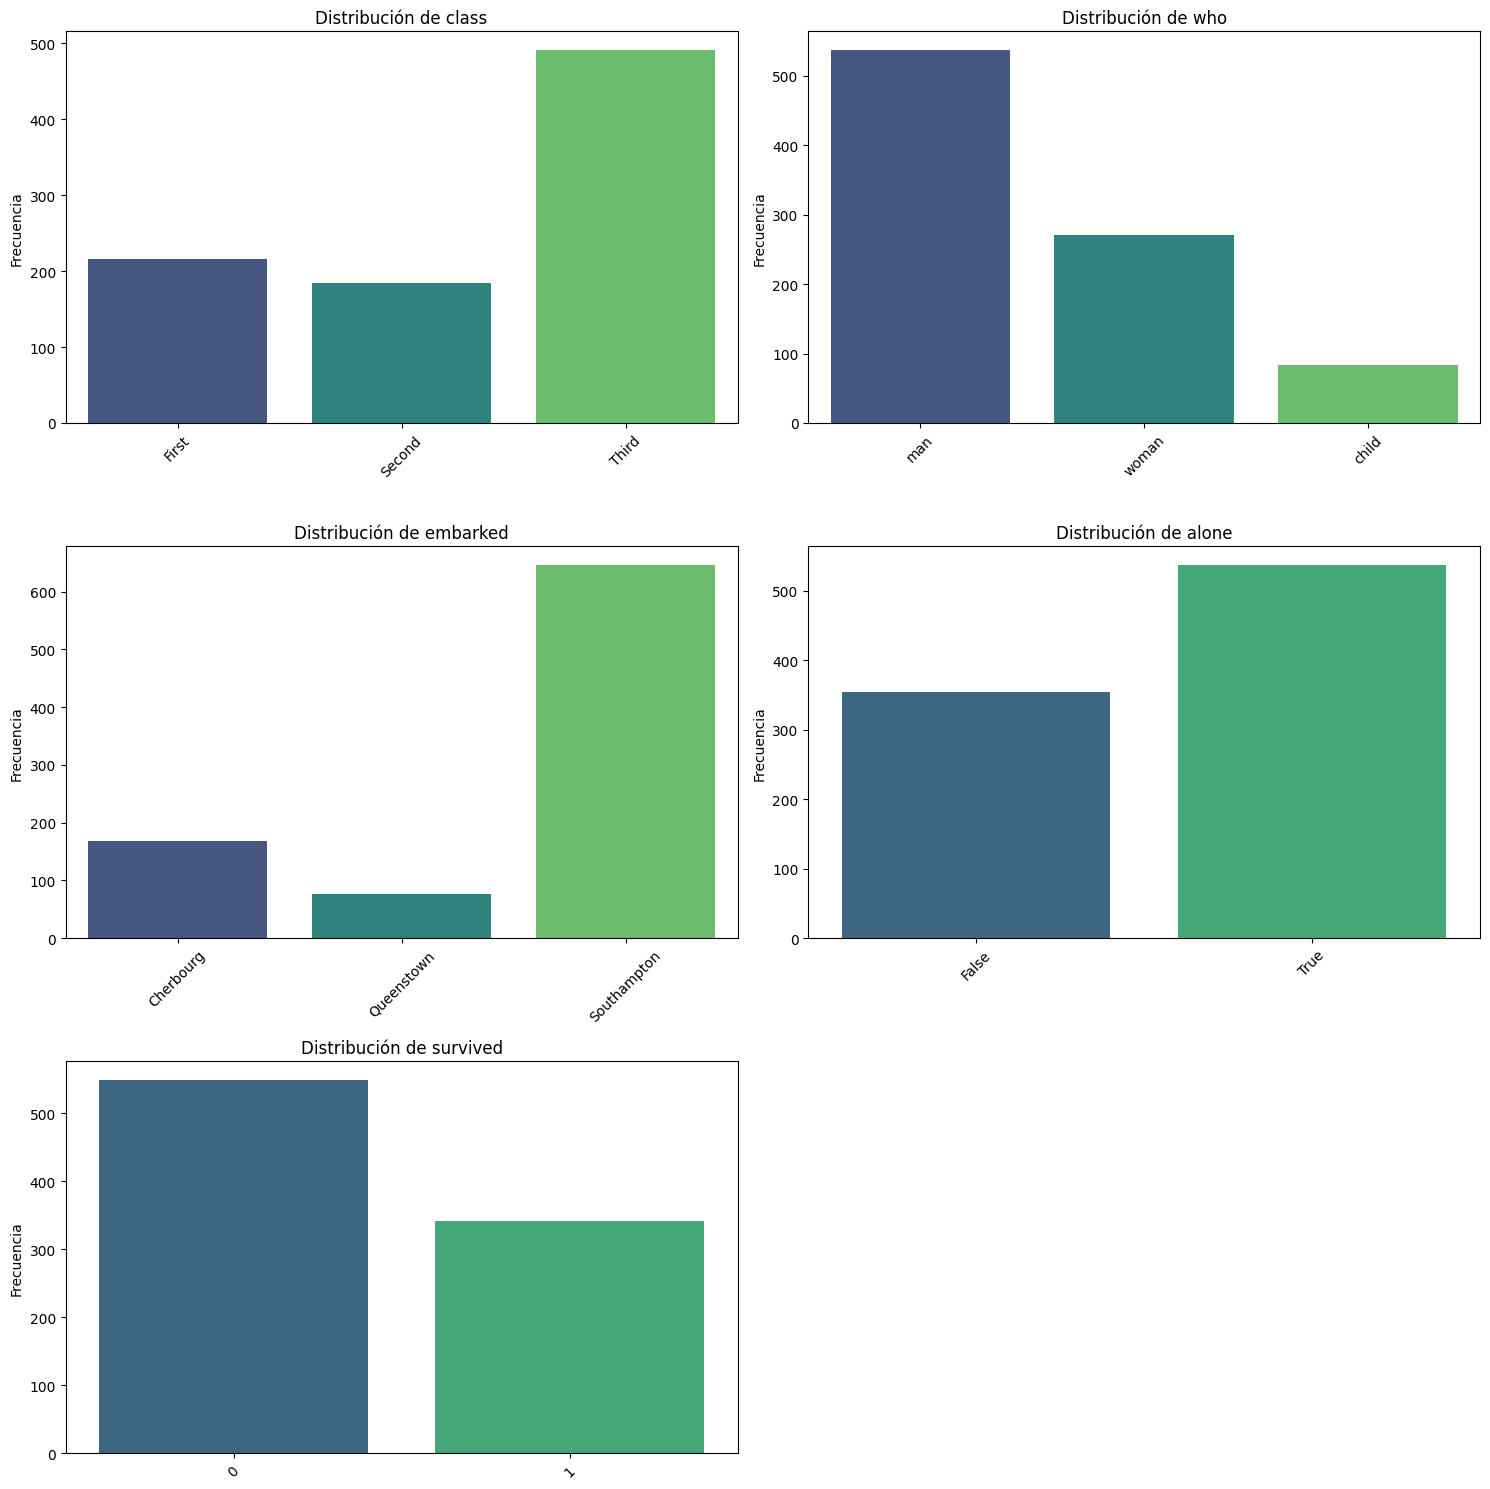

In [14]:
pinta_distribucion_categoricas(df_titanic,listado_categoricas)

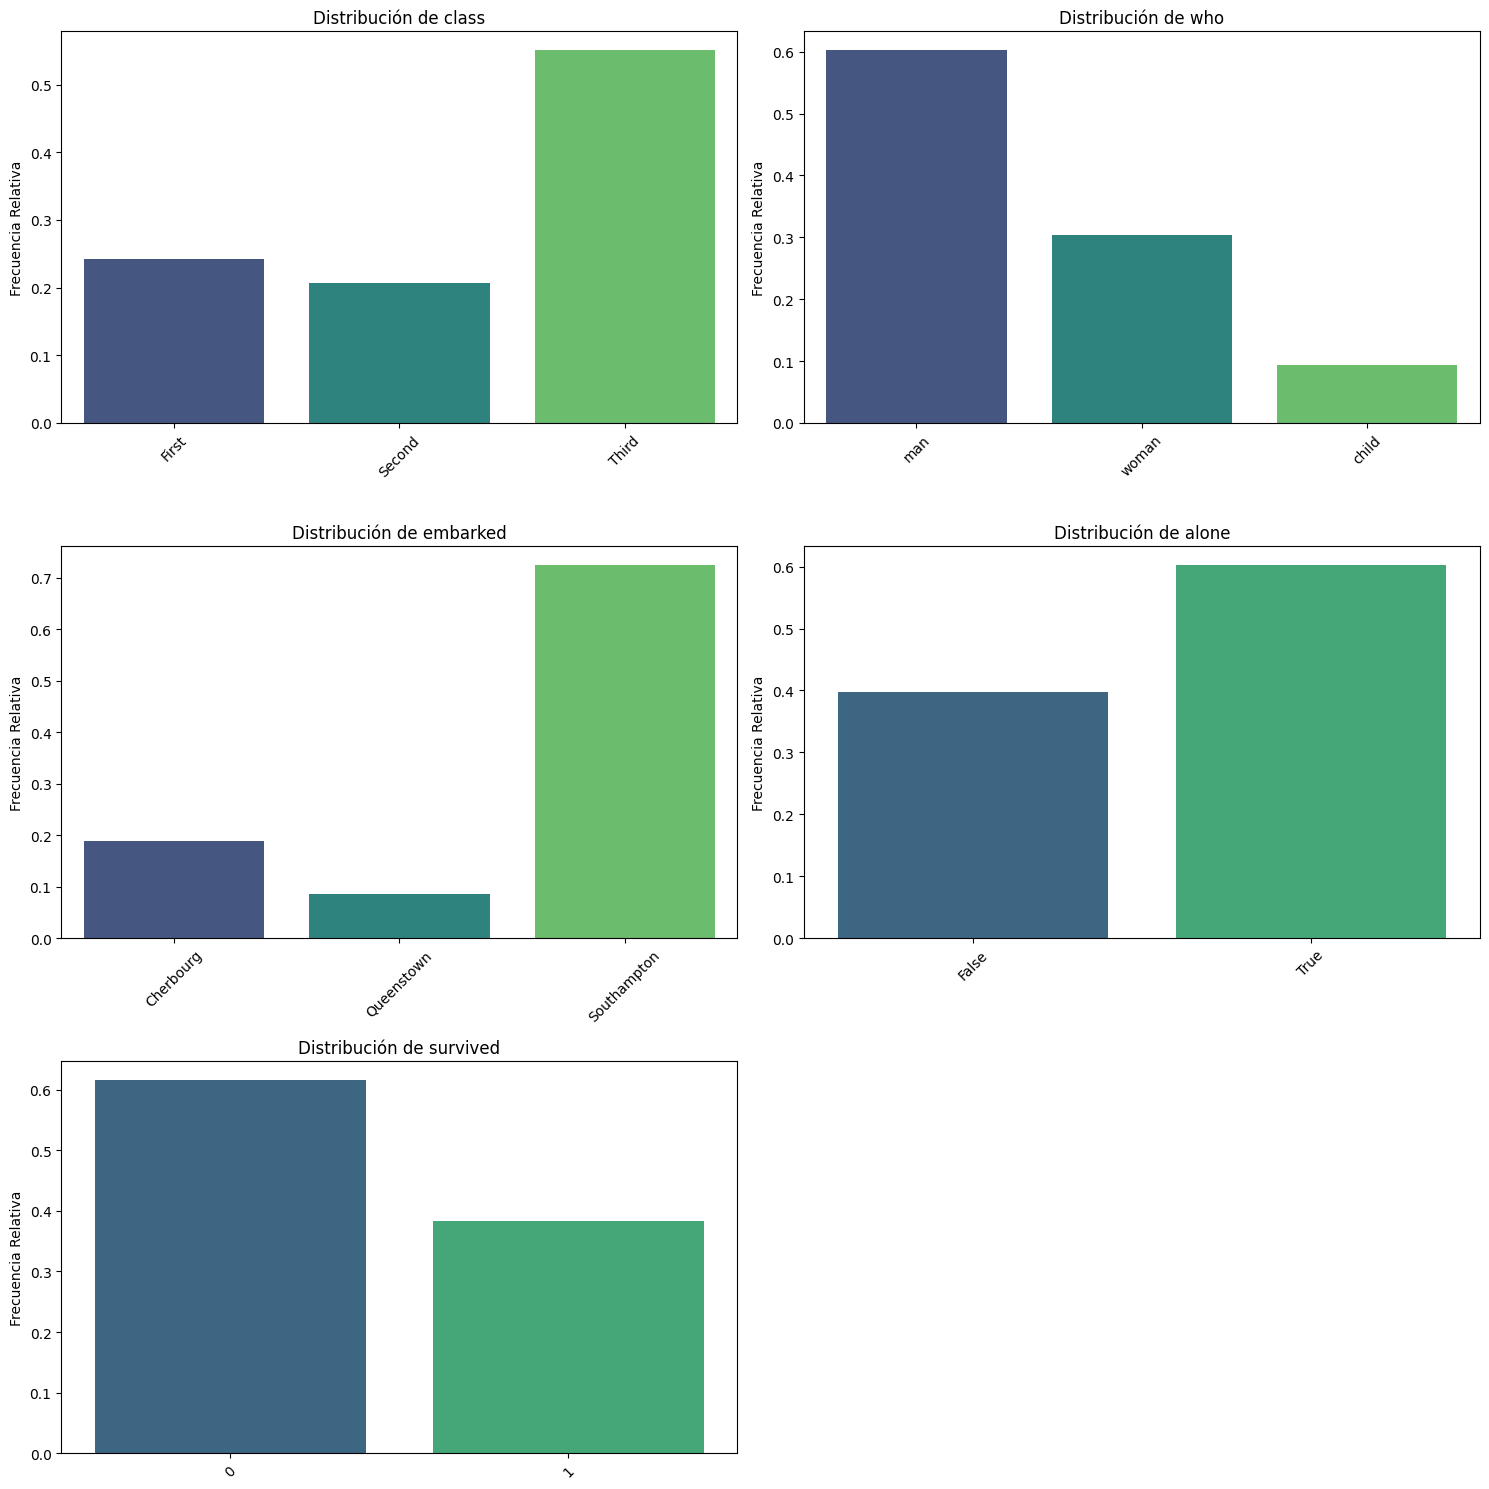

In [15]:
pinta_distribucion_categoricas(df_titanic,listado_categoricas,relativa=True)

### #2.2 Numéricas
survived,age,fare,alone

In [16]:
listado_numericas=["age","fare"]

In [17]:
for x in listado_numericas:
    print(df_titanic[x].value_counts(True),"\n")

age
29.699118    0.198653
24.000000    0.033670
22.000000    0.030303
18.000000    0.029181
28.000000    0.028058
               ...   
36.500000    0.001122
55.500000    0.001122
0.920000     0.001122
23.500000    0.001122
74.000000    0.001122
Name: proportion, Length: 89, dtype: float64 

fare
8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: proportion, Length: 248, dtype: float64 



In [18]:
df_titanic[listado_numericas].describe()

,age,fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [19]:
df_titanic[listado_numericas].mode().T

,0
age,29.699118
fare,8.050000


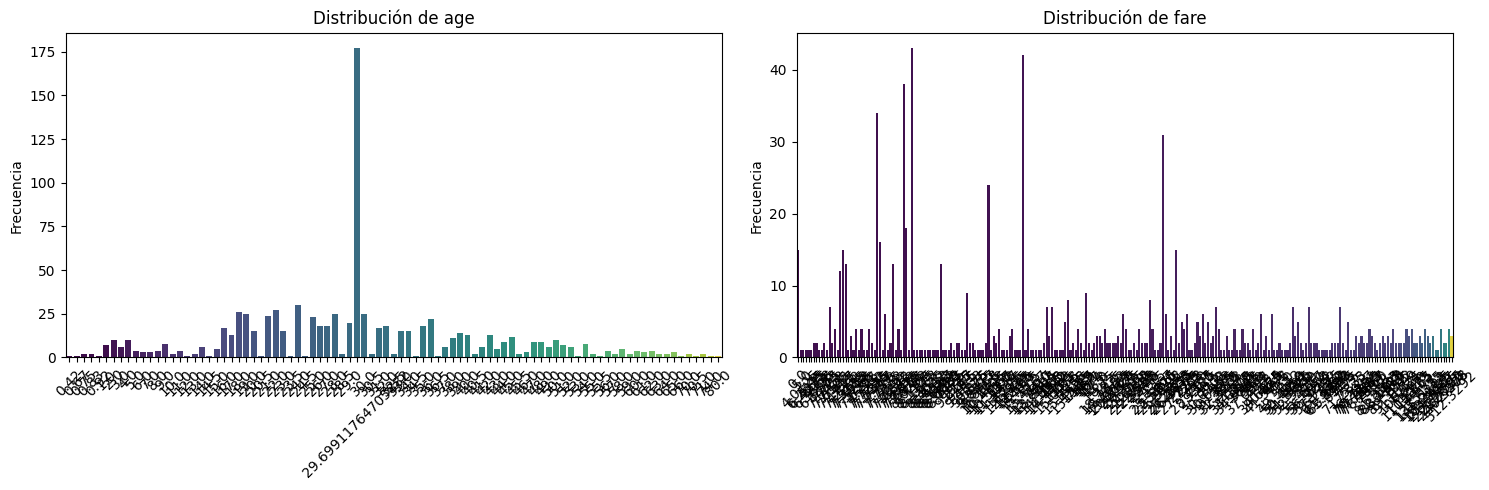

In [20]:
pinta_distribucion_categoricas(df_titanic,listado_numericas)

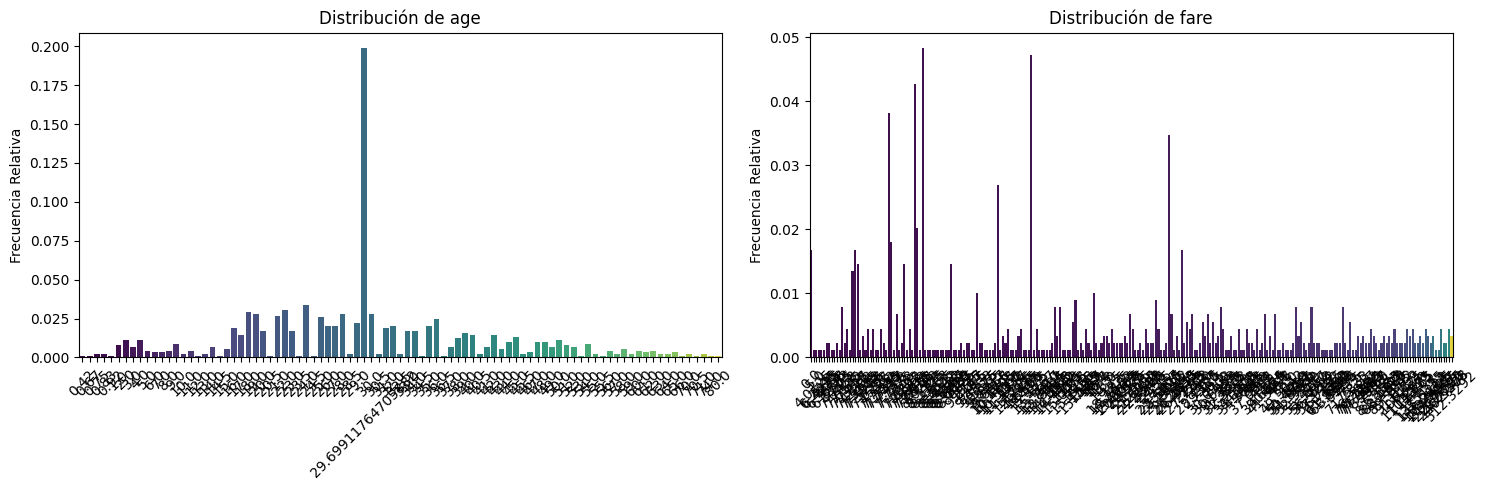

In [56]:
pinta_distribucion_categoricas(df_titanic,listado_numericas,relativa=True)

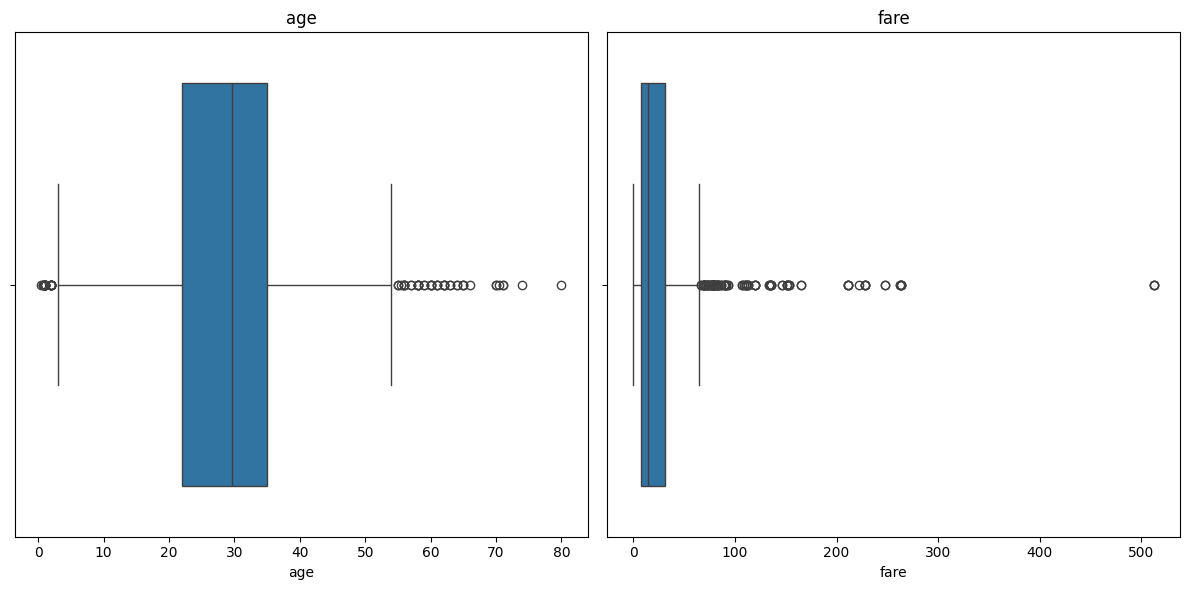

In [21]:
plot_multiple_boxplots(df_titanic,listado_numericas)

In [22]:
#RANGO
df_titanic[listado_numericas].describe().loc["max"]-df_titanic[listado_numericas].describe().loc["min"]

age      79.5800
fare    512.3292
dtype: float64

In [23]:
#INDICE INTERCUARTÍLICO

get_IQR(df_titanic,listado_numericas)

age     13.0000
fare    23.0896
dtype: float64

In [24]:
#COEFICIENTE DE VARIACIÓN
var(df_titanic,listado_numericas)


,std,mean,CV
age,13.002015,29.699118,0.437791
fare,49.693429,32.204208,1.543073


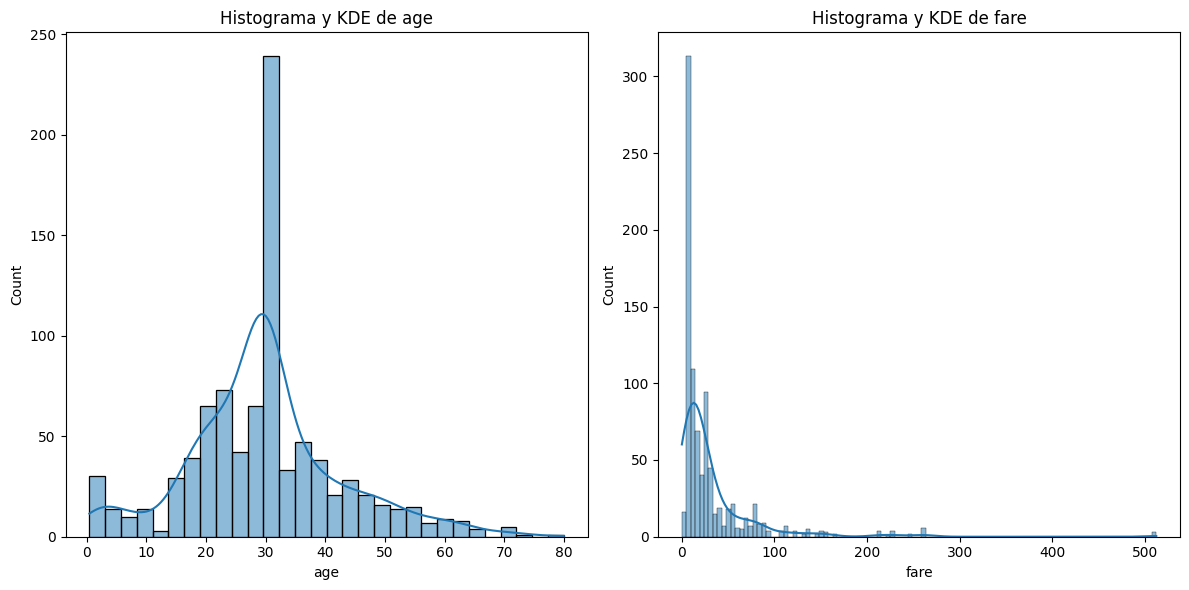

In [25]:
plot_histo_den(df_titanic,listado_numericas)

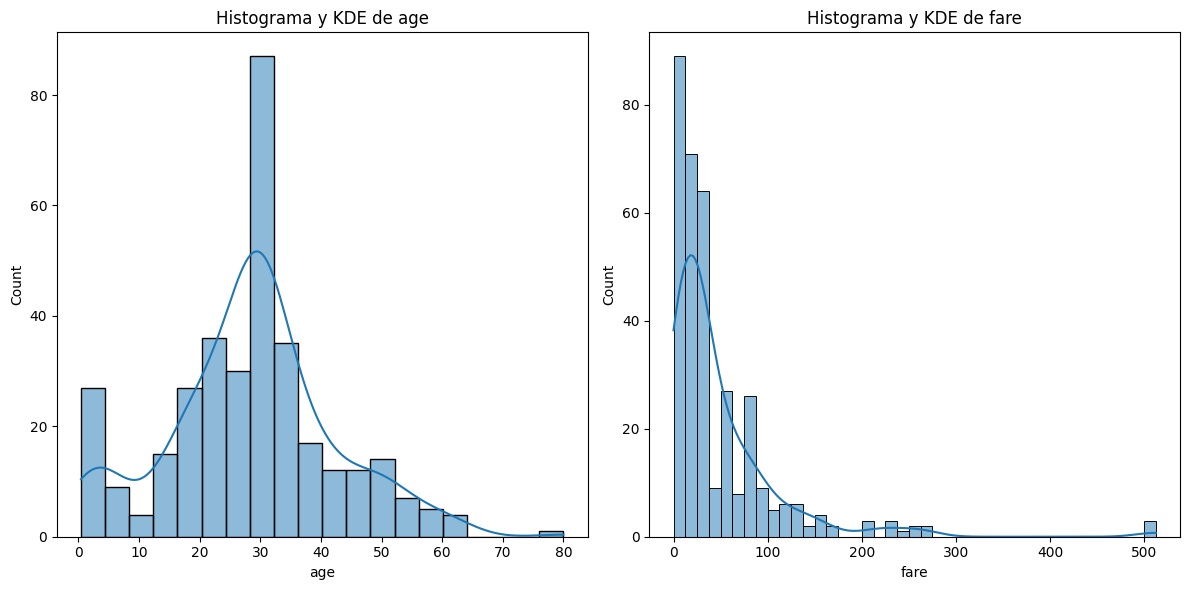

In [26]:
plot_histo_den(df_titanic[df_titanic.survived==1],listado_numericas)

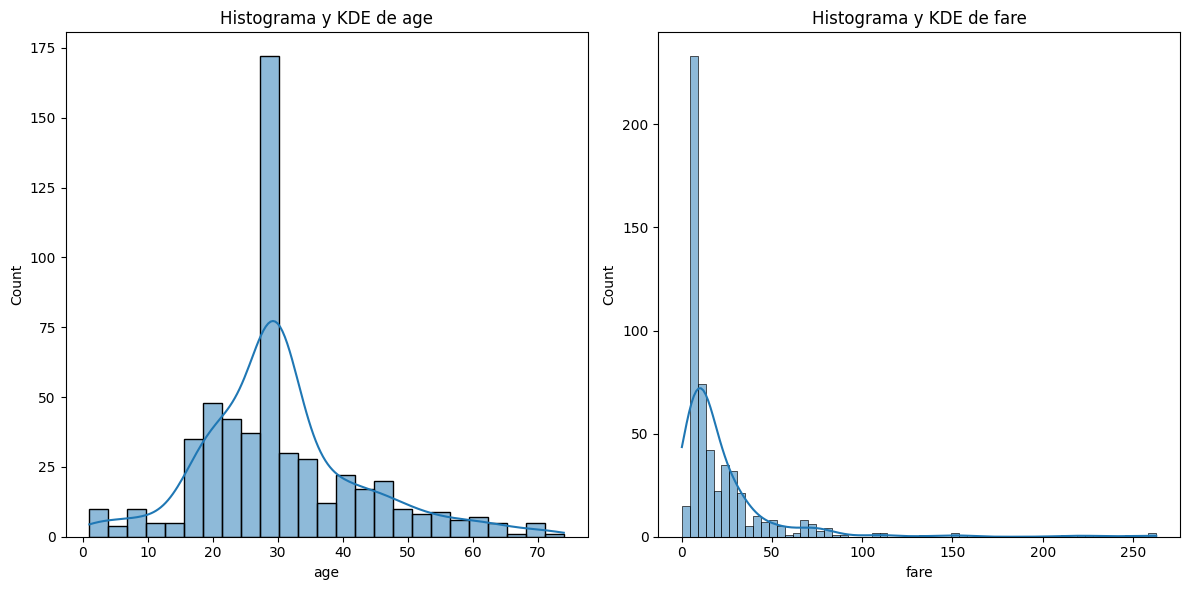

In [70]:
plot_histo_den(df_titanic[df_titanic.survived==0],listado_numericas)

In [27]:
df_titanic["class"].value_counts(True)

class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64

In [28]:
df_3=df_titanic[df_titanic["class"]=="Third"]
df_2=df_titanic[df_titanic["class"]=="Second"]
df_1=df_titanic[df_titanic["class"]=="First"]



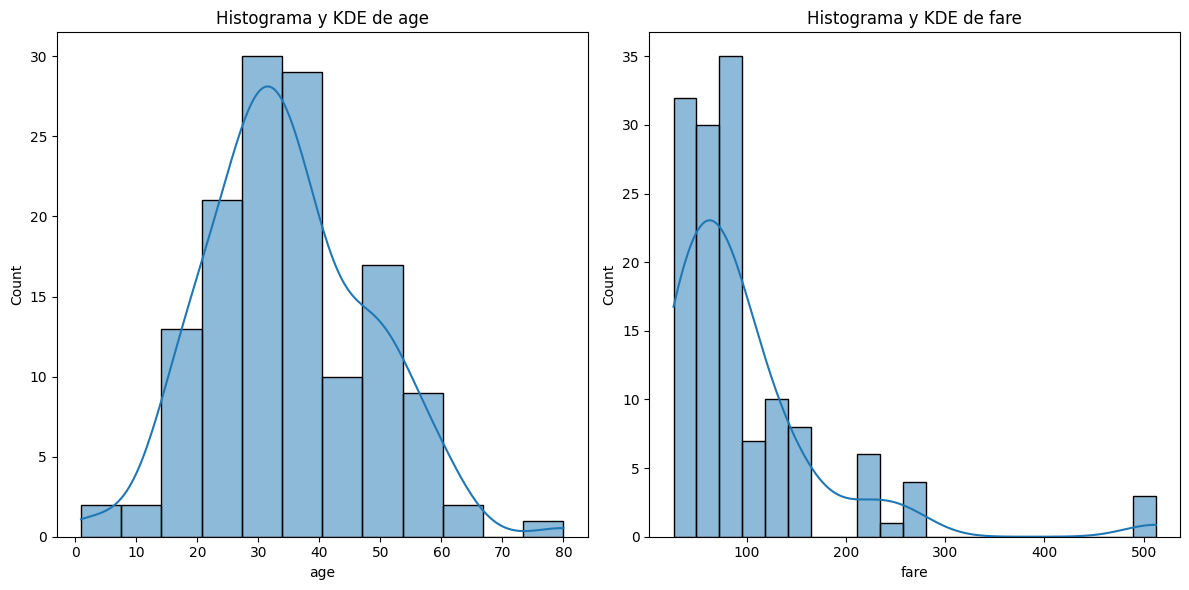

In [29]:
plot_histo_den(df_1[df_1.survived==1],listado_numericas)

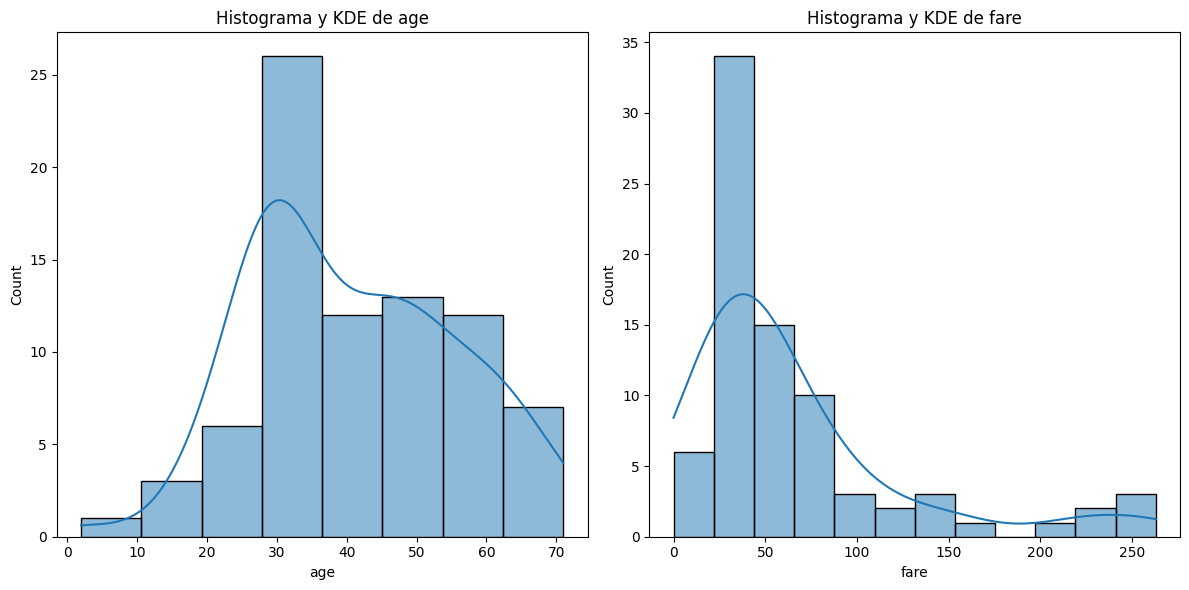

In [30]:
plot_histo_den(df_1[df_1.survived==0],listado_numericas)

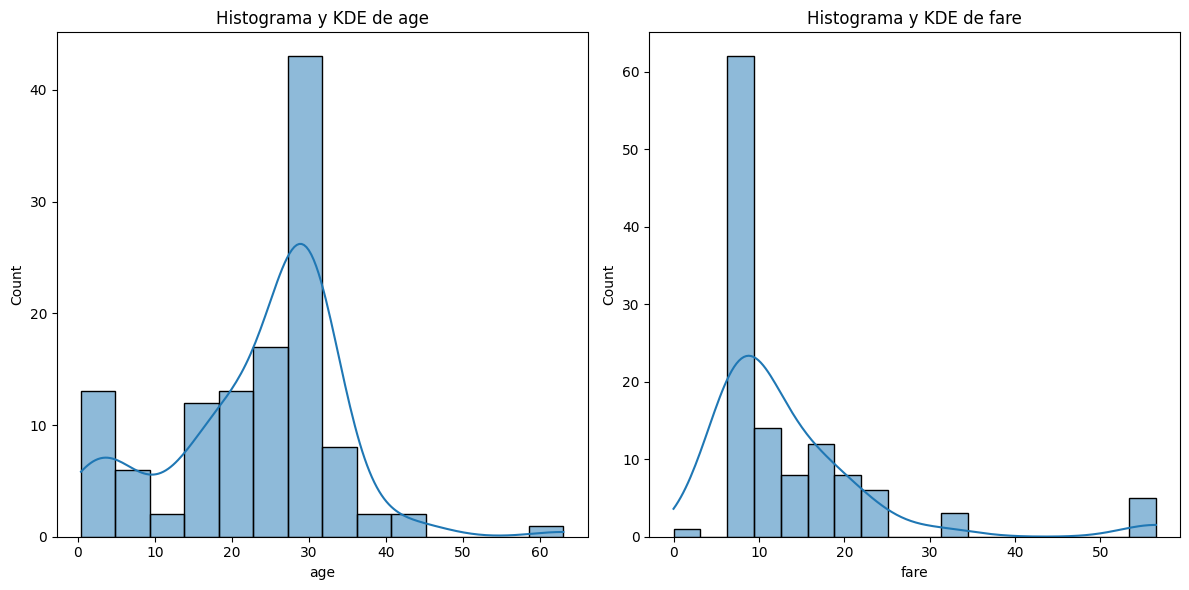

In [81]:
plot_histo_den(df_3[df_3.survived==1],listado_numericas)

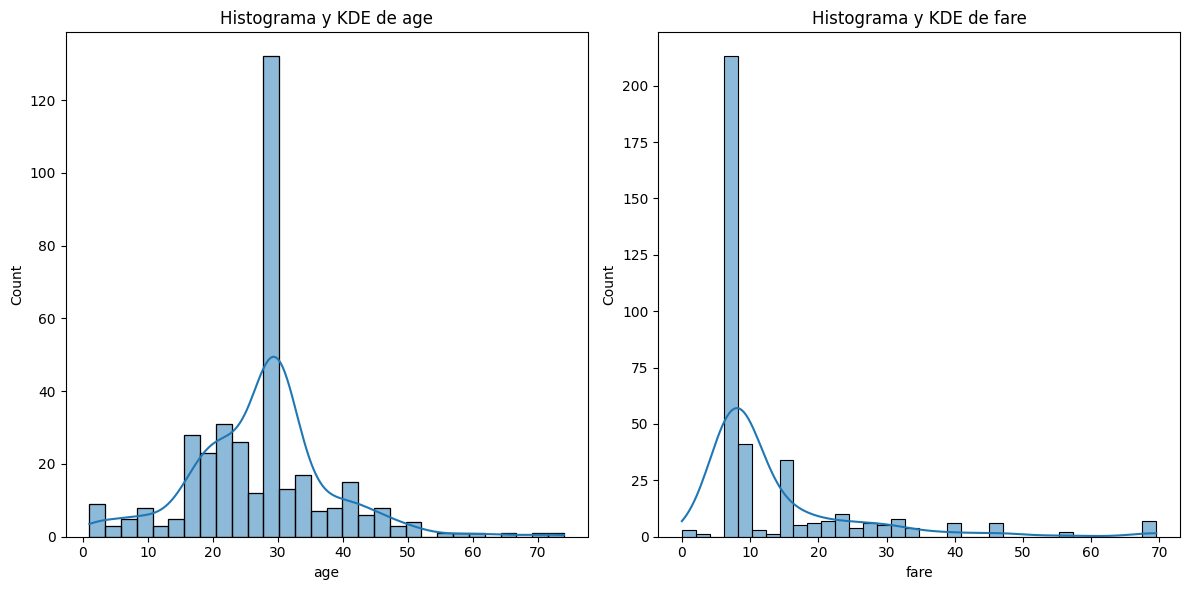

In [31]:
plot_histo_den(df_3[df_3.survived==0],listado_numericas)